In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
data = pd.read_csv('edlich-kmeans-A0.csv')

In [2]:
print(data.shape)
data.head()

(100, 3)


,V1,V2,V3
0,-5.340236,4.747246,3.823326
1,-9.587065,-3.434466,9.701839
2,-8.385012,-3.902794,8.514620
3,5.708226,2.658575,5.404482
4,-7.431665,-4.390251,9.003216


In [11]:
f1 = data['V1'].values
f2 = data['V2'].values
f3 = data['V3'].values
X = np.array(list(zip(f1, f2, f3)))

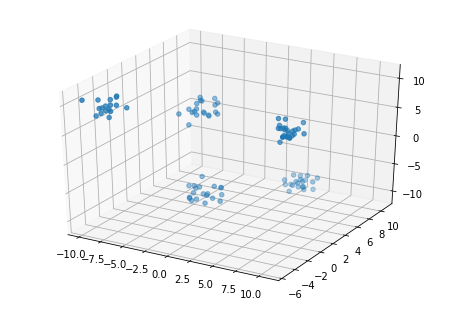

In [12]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

The graphic might suggested that 5 could be a good k but what if we can not visualize it like here. We have to try some k to find the best one.

In [13]:
# Finding out the best k
for k in range (1, 11):

    kmeans_model = KMeans(n_clusters=k).fit(X)

    labels = kmeans_model.labels_

    interia = kmeans_model.inertia_
    print("k:",k, " cost:", interia) 


k: 1  cost: 10260.706784799486
k: 2  cost: 4899.629957493973
k: 3  cost: 2409.5098787388397
k: 4  cost: 1278.1820569817
k: 5  cost: 441.62328912304423
k: 6  cost: 213.7503527389633
k: 7  cost: 193.70273710209204
k: 8  cost: 177.37453116224393
k: 9  cost: 163.8717359730977
k: 10  cost: 149.4911027248246


The costs of k 1-4 are too high and the costs from 6 on doesn't decrease much anymore. That probably indicates, that there two centers in the same group. So 5 seams to be the best k.

In [14]:
# Initializing 5 clusters
kmeans = KMeans(n_clusters=5)
kmeans = kmeans.fit(X)

In [15]:
# Predicting the clusters
labels = kmeans.predict(X)
labels

array([1, 3, 3, 2, 3, 4, 2, 3, 0, 2, 3, 0, 2, 4, 1, 3, 0, 4, 1, 1, 3, 0,
       1, 3, 3, 2, 0, 0, 0, 4, 0, 0, 4, 4, 3, 1, 4, 1, 0, 3, 4, 4, 4, 1,
       4, 3, 2, 2, 4, 2, 2, 4, 0, 0, 2, 2, 1, 2, 3, 4, 2, 1, 2, 2, 4, 2,
       1, 1, 1, 4, 4, 2, 0, 2, 2, 0, 3, 4, 2, 0, 0, 4, 3, 1, 1, 3, 1, 1,
       1, 2, 0, 0, 0, 3, 2, 2, 0, 4, 1, 1])

In [16]:
# Getting the cluster centers
C = kmeans.cluster_centers_
C

array([[-2.40331671,  2.14752865, -8.02378894],
       [-5.10691526,  5.60179825,  3.71956936],
       [ 6.47155208,  2.70446035,  5.19967608],
       [-8.53242046, -3.55401526,  8.96857685],
       [ 3.66536804,  8.91074968, -9.06579829]])

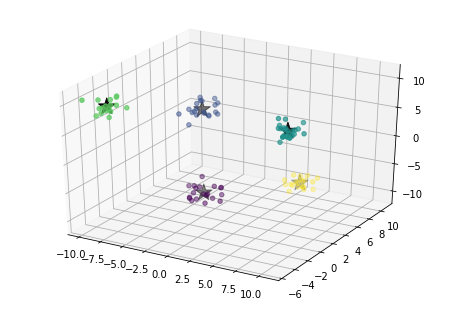

In [17]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=300)

In [27]:
# Printing the clustering vector
b = X.copy()
b = np.insert(b, 3, labels, axis=1)
sorted(b,key=lambda x: x[3])

[array([-3.40526552,  2.28142739, -7.63117179,  0.        ]),
 array([-4.61692581,  2.83368789, -7.96289974,  0.        ]),
 array([-3.07076859,  1.47953458, -7.79850529,  0.        ]),
 array([-1.39236828,  0.98984384, -8.77572229,  0.        ]),
 array([-0.97476618,  2.97478707, -8.53008822,  0.        ]),
 array([-3.40786306,  3.24854313, -6.19404276,  0.        ]),
 array([-1.36947289,  2.1142807 , -8.67632312,  0.        ]),
 array([-1.70617854,  1.66601247, -7.9268549 ,  0.        ]),
 array([-2.34049748, -0.05101276, -7.26979297,  0.        ]),
 array([-3.79872596,  2.55320535, -7.51800226,  0.        ]),
 array([-2.52701507,  2.89903674, -8.80825287,  0.        ]),
 array([-2.57316647,  1.2603038 , -8.61121531,  0.        ]),
 array([-1.54920423,  3.68675988, -7.89780973,  0.        ]),
 array([-2.71827605,  0.74916694, -8.58455388,  0.        ]),
 array([-1.40993477,  2.42873792, -6.75821297,  0.        ]),
 array([-2.85053053,  2.11211451, -7.10981719,  0.        ]),
 array([